In [65]:
from data_processor import *
from global_variables import *
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
if not os.path.exists('pics/'):
    os.makedirs('pics/')

# A Single City's Information

In [9]:
# Parameter
city = 'KSAN'

## Weather

### Weather - Yearly

In [18]:
# Parameter
year = 2019
fname = 'pics/{}_y{}.jpg'.format(city,year)
# Code
year_start, year_end = get_yearly_start_end(year=year)
weather_info = get_info(city,year_start, year_end, info_type='weather')
keys = weather_info.index.tolist()
values = weather_info.days.tolist()

The weather information of San Diego during 20190101-20190430 :
Total days: 120
              days  percentage
icon                          
rain            41    0.341667
partlysunny     30    0.250000
mostlysunny     22    0.183333
partlycloudy    14    0.116667
clear            7    0.058333
mostlycloudy     3    0.025000
tstorms          2    0.016667
hazy             1    0.008333


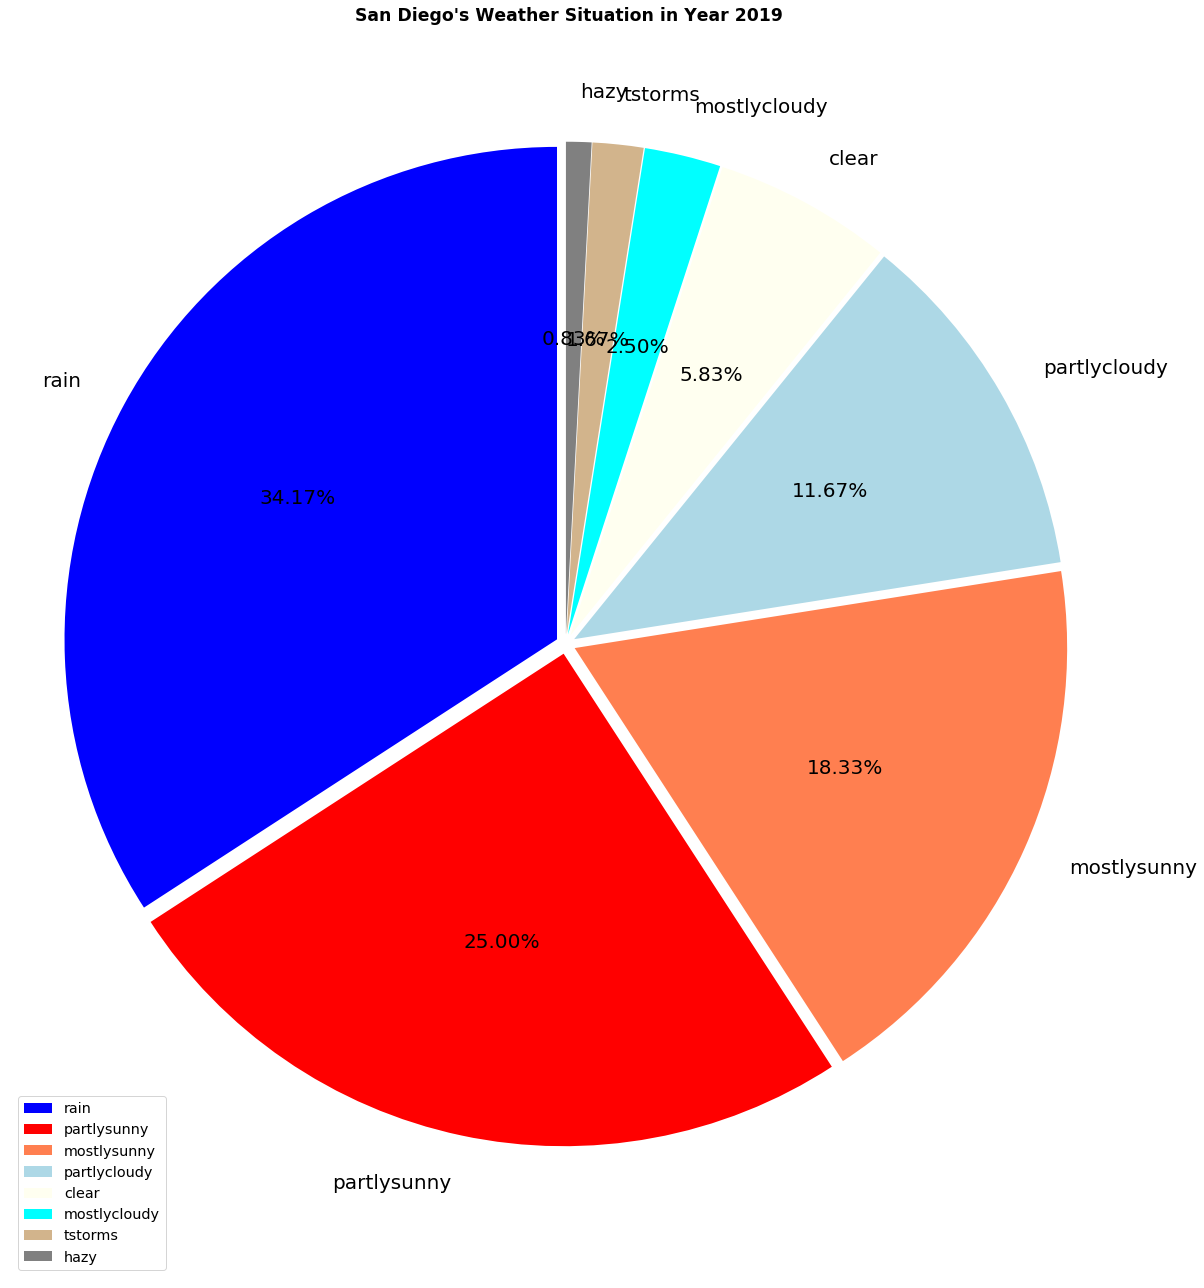

In [19]:
# Plot
plt.figure(figsize=(20,23))
color_list = list(weather_color_refer[k] for k in keys)
patches,label_text,percent_text = plt.pie(values,
                                          explode= tuple([0.02]*len(keys)),
                                          labels=keys,
                                          colors=color_list,
                                          autopct = '%3.2f%%', #digits
                                          shadow = False, #No Shadow
                                          startangle =90, #reverse start angle
                                          pctdistance = 0.6) #数值距圆心半径倍数距离
plt.axis('equal')
plt.legend(loc='lower left',fontsize='x-large')
for t in label_text:
    t.set_size(20)
for t in percent_text:
    t.set_size(20)
#plt.savefig(fname)
title_str = '{}\'s Weather Situation in Year {}'.format(code_city_refer[city], year)
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.show()


### Weather - Monthly

In [76]:
# Parameter
year_monthly = 2019
month_monthly = 1
fname_monthly= 'pics/{}_y{}_m{}.jpg'.format(city, year_monthly, month_monthly)
# Code
month_start, month_end = get_monthly_start_end(year=year, month=month_monthly)
weather_info_monthly = get_info(city, month_start, month_end, info_type='weather')
keys_monthly = weather_info_monthly.index.tolist()
values_monthly = weather_info_monthly.days.tolist()

The weather information of San Diego during 20190101-20190131 :
Total days: 31
              days  percentage
icon                          
mostlysunny     10    0.322581
rain             9    0.290323
partlysunny      5    0.161290
clear            2    0.064516
partlycloudy     2    0.064516
hazy             1    0.032258
mostlycloudy     1    0.032258
tstorms          1    0.032258


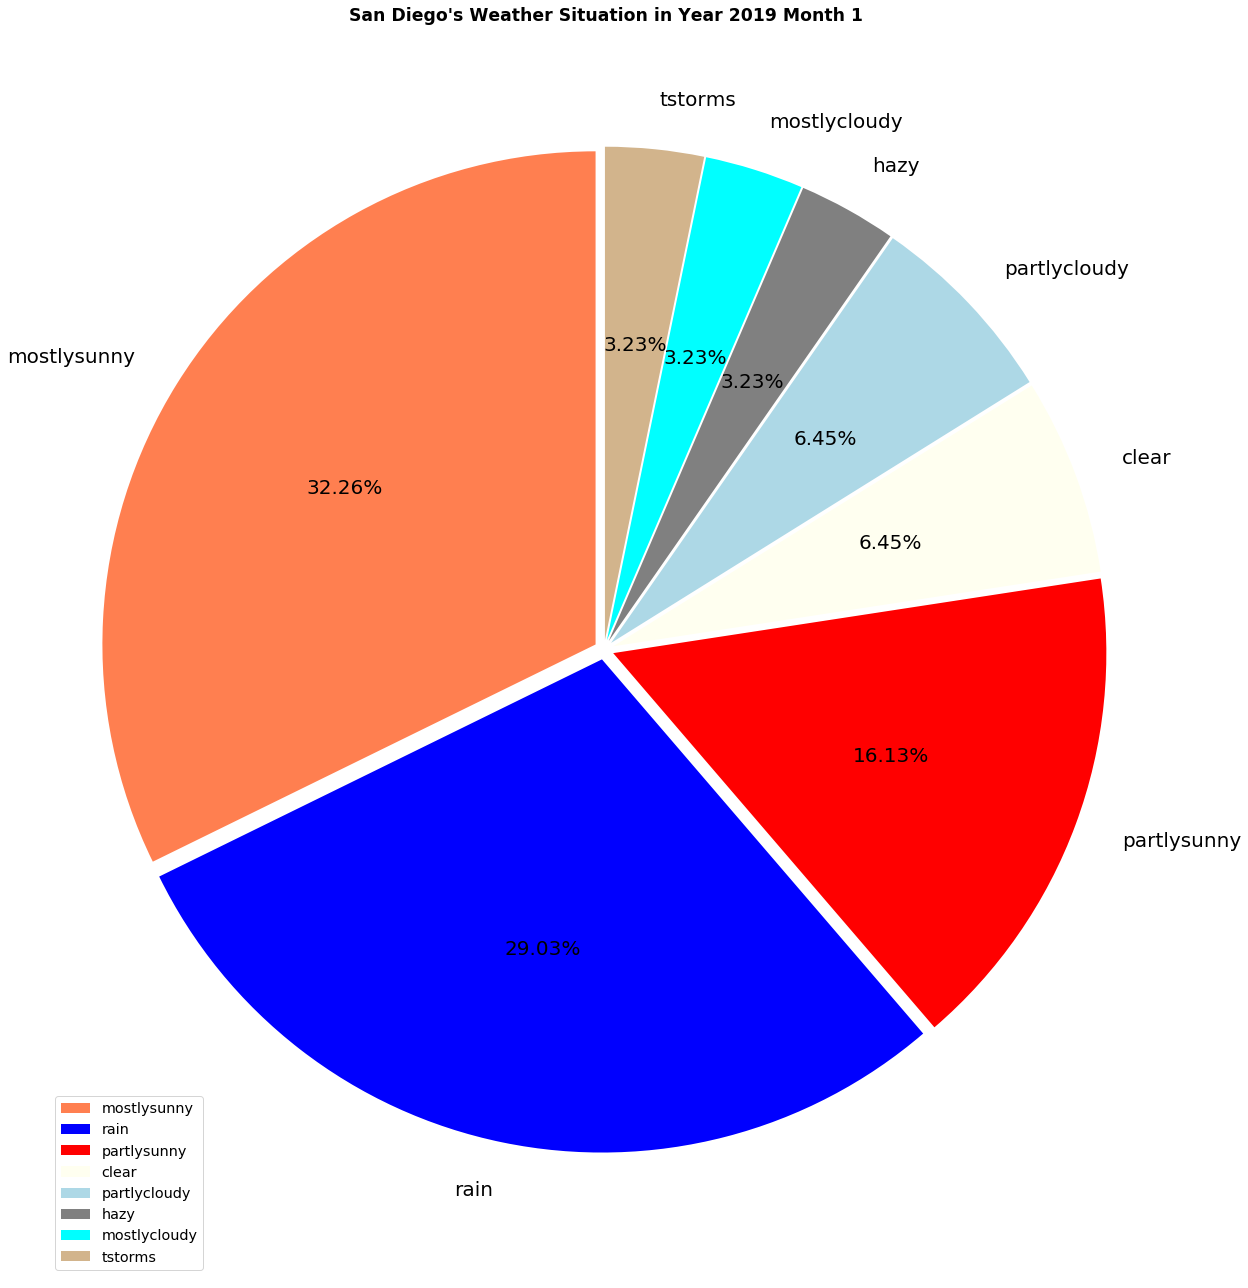

In [23]:
# Plot
plt.figure(figsize=(20,23))
color_list_monthly = list(weather_color_refer[k] for k in keys_monthly)
patches,label_text,percent_text = plt.pie(values_monthly,
                                          explode= tuple([0.02]*len(keys)),
                                          labels=keys_monthly,
                                          colors=color_list_monthly,
                                          autopct = '%3.2f%%', #digits
                                          shadow = False, #No Shadow
                                          startangle =90, #reverse start angle
                                          pctdistance = 0.6) #数值距圆心半径倍数距离
plt.axis('equal')
plt.legend(loc='lower left',fontsize='x-large')
for t in label_text:
    t.set_size(20)
for t in percent_text:
    t.set_size(20)
#plt.savefig(fname)
title_str = '{}\'s Weather Situation in Year {} Month {}'.format(code_city_refer[city], year_monthly, month_monthly)
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.show()

##   Temperature

### Temperature-mean_mth for yrs

In [88]:
# Parameter
yrs_temp_mth = [1990+i for i in range(30)] # year range
month_temp_mth = 1
fname= 'pics/{}_m{}_yrs_temp.jpg'.format(city,month_temp_mth)
# Code
value_mean_temp = []
for year in yrs_temp_mth:
    month_start_temp, month_end_temp = get_monthly_start_end(year=year, month=month_temp_mth)
    temp_info = get_info(city, month_start_temp, month_end_temp, info_type ='temperature')
    mean_temp_mth = temp_info['mean'] # selected feature
    value_mean_temp.append(mean_temp_mth)  #
avg_mean_yrs = sum(value_mean_temp)/len(year_temp_mth)

The temperature information of San Diego during 19900101-19900131 :
{'mean': 56.41935483870968, 'std': 3.0085898529420407, 'count': 31, 'max': 64.0, 'max_dates': [19900124], 'min': 50.0, 'min_dates': [19900118]}
The temperature information of San Diego during 19910101-19910131 :
{'mean': 57.29032258064516, 'std': 2.7226647288651704, 'count': 31, 'max': 64.0, 'max_dates': [19910114], 'min': 52.0, 'min_dates': [19910125]}
The temperature information of San Diego during 19920101-19920131 :
{'mean': 57.193548387096776, 'std': 3.102894936869006, 'count': 31, 'max': 65.0, 'max_dates': [19920131], 'min': 52.0, 'min_dates': [19920113]}
The temperature information of San Diego during 19930101-19930131 :
{'mean': 57.0, 'std': 3.7594325812991158, 'count': 31, 'max': 62.0, 'max_dates': [19930107, 19930114, 19930125, 19930126], 'min': 48.0, 'min_dates': [19930104]}
The temperature information of San Diego during 19940101-19940131 :
{'mean': 57.903225806451616, 'std': 3.1022017848583765, 'count': 31

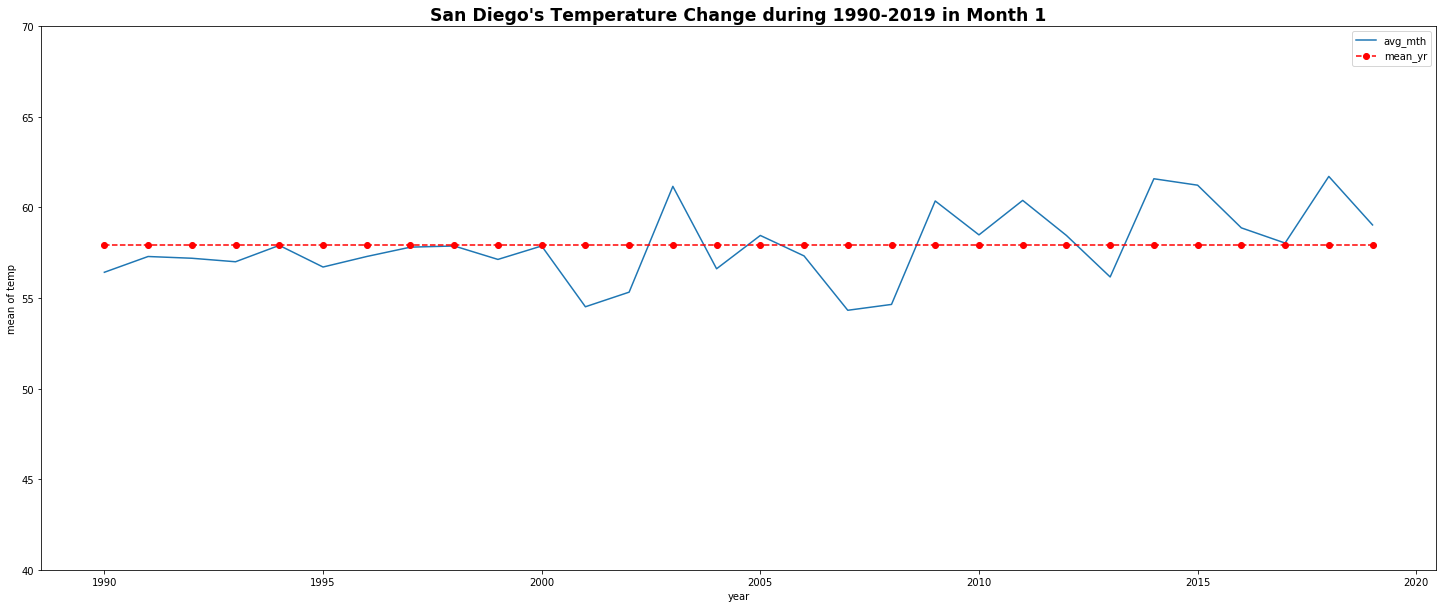

In [89]:
# plot
plt.figure(figsize=(25,10))
plt.plot(yrs_temp_mth,value_mean_temp,yrs_temp_mth,[avg_mean_yrs]*len(yrs_temp_mth),'or--')
plt.xlabel('year') # apply labels
plt.ylabel('mean of temp')
plt.ylim(40,70)
plt.legend(('avg_mth','mean_yr'),loc='best')
title_str = '{}\'s Temperature Change during {}-{} in Month {}'.format(code_city_refer[city], yrs_temp_mth[0], yrs_temp_mth[-1], month_temp_mth)
plt.title(title_str,fontsize='xx-large',fontweight='bold')
#plt.savefig(fname)
plt.show() 

## Precip

In [93]:
# Parameter
yrs_precip = [1990+i for i in range(30)] # year range
month_precip = 1
fname= 'pics/{}_m{}_yrs_precip.jpg'.format(city,month_precip)
# Code
value_mean_precip = []
for year in yrs_precip:
    month_start_precip, month_end_precip = get_monthly_start_end(year=year, month=month_precip)
    precip_info = get_info(city, month_start_precip, month_end_precip, info_type ='precipitation')
    mean_precip = precip_info['mean'] # selected feature
    value_mean_precip.append(mean_precip)  #
avg_mean_yrs = sum(value_mean_precip)/len(yrs_precip)

The precipitation information of San Diego during 19900101-19900131 :
{'mean': 0.072580645161290328, 'std': 0.1796472050424662, 'count': 31, 'max': 0.82999999999999996, 'max_dates': [], 'min': 0.0, 'min_dates': []}
The precipitation information of San Diego during 19910101-19910131 :
{'mean': 2.3241935483870968, 'std': 12.744303505015756, 'count': 31, 'max': 70.989999999999995, 'max_dates': [], 'min': 0.0, 'min_dates': []}
The precipitation information of San Diego during 19920101-19920131 :
{'mean': 2.3393548387096779, 'std': 12.697973837187273, 'count': 31, 'max': 70.75, 'max_dates': [], 'min': 0.0, 'min_dates': []}
The precipitation information of San Diego during 19930101-19930131 :
{'mean': 0.45419354838709686, 'std': 0.46377993483654423, 'count': 31, 'max': 1.8, 'max_dates': [], 'min': 0.0, 'min_dates': []}
The precipitation information of San Diego during 19940101-19940131 :
{'mean': 0.33225806451612899, 'std': 0.31589776486936777, 'count': 31, 'max': 1.3400000000000001, 'max_da

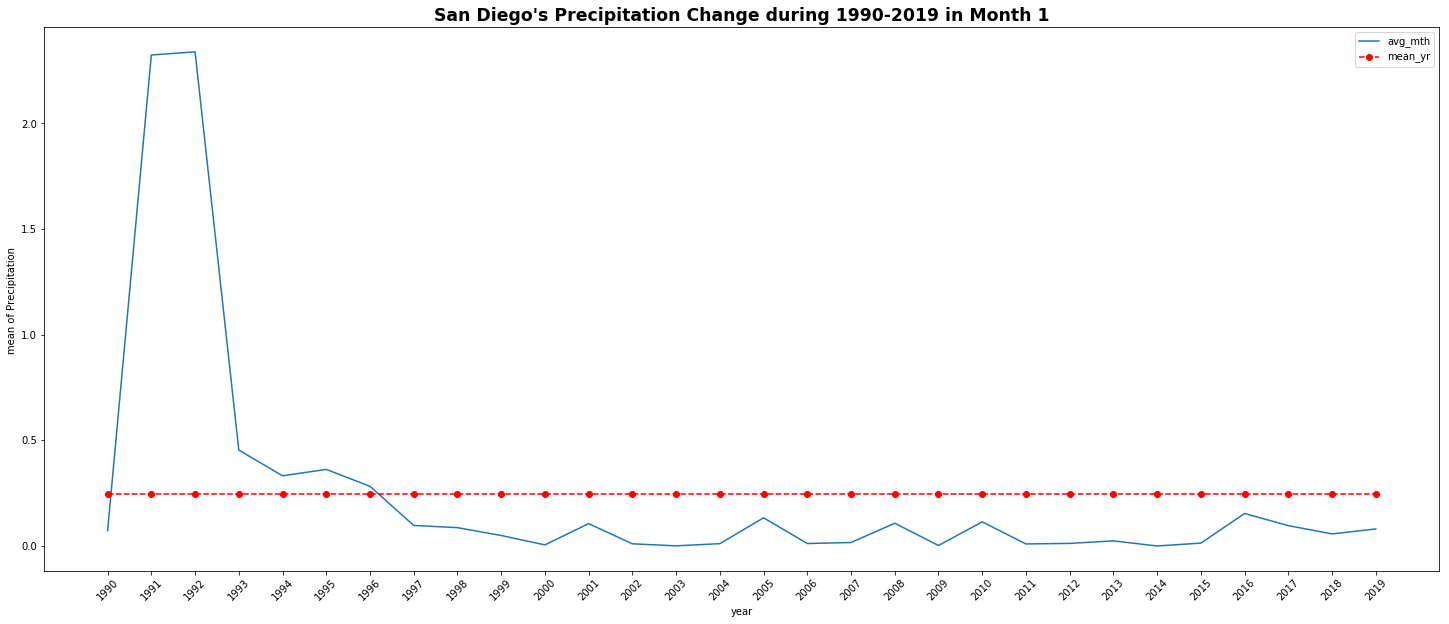

In [94]:
# plot
plt.figure(figsize=(25,10))
plt.plot(yrs_precip,value_mean_precip, yrs_precip, [avg_mean_yrs]*len(yrs_precip),'or--')
plt.xticks(yrs_precip, rotation = 45)
plt.xlabel('year') # apply labels
plt.ylabel('mean of Precipitation ')
# plt.ylim(40,70)
plt.legend(('avg_mth','mean_yr'),loc='best')
title_str = '{}\'s Precipitation Change during {}-{} in Month {}'.format(code_city_refer[city], yrs_precip[0], yrs_precip[-1], month_precip)
plt.title(title_str,fontsize='xx-large',fontweight='bold')
#plt.savefig(fname)
plt.show() 

# Comparison between cities

In [131]:
# city_list=[citycode for citycode in city_code_refer.values()]
city_list = ['KSEA', 'KSFO','KBUR','KSAN','KHOU','KBOS','KLGA','KDCA']

The temperature information of Seattle during 19900101-19900131 :
{'mean': 42.483870967741936, 'std': 3.7848026610109673, 'count': 31, 'max': 50.0, 'max_dates': [19900105], 'min': 36.0, 'min_dates': [19900126, 19900131]}
The temperature information of Seattle during 19910101-19910131 :
{'mean': 39.87096774193548, 'std': 5.4328748404742457, 'count': 31, 'max': 50.0, 'max_dates': [19910112], 'min': 31.0, 'min_dates': [19910127]}
The temperature information of Seattle during 19920101-19920131 :
{'mean': 44.161290322580648, 'std': 4.9872956880026571, 'count': 31, 'max': 54.0, 'max_dates': [19920130], 'min': 33.0, 'min_dates': [19920107]}
The temperature information of Seattle during 19930101-19930131 :
{'mean': 37.838709677419352, 'std': 6.3039499479482357, 'count': 31, 'max': 49.0, 'max_dates': [19930125, 19930126, 19930127], 'min': 28.0, 'min_dates': [19930106]}
The temperature information of Seattle during 19940101-19940131 :
{'mean': 44.806451612903224, 'std': 3.8679827200468004, 'coun

The temperature information of San Francisco during 20070101-20070131 :
{'mean': 48.322580645161288, 'std': 3.8068980966502863, 'count': 31, 'max': 54.0, 'max_dates': [20070108, 20070129], 'min': 40.0, 'min_dates': [20070114]}
The temperature information of San Francisco during 20080101-20080131 :
{'mean': 48.516129032258064, 'std': 2.8386730202911772, 'count': 31, 'max': 55.0, 'max_dates': [20080104], 'min': 44.0, 'min_dates': [20080122, 20080124, 20080129]}
The temperature information of San Francisco during 20090101-20090131 :
{'mean': 51.58064516129032, 'std': 4.4779027349001019, 'count': 31, 'max': 61.0, 'max_dates': [20090113], 'min': 42.0, 'min_dates': [20090104]}
The temperature information of San Francisco during 20100101-20100131 :
{'mean': 51.516129032258064, 'std': 2.4613135753351369, 'count': 31, 'max': 58.0, 'max_dates': [20100112], 'min': 47.0, 'min_dates': [20100121, 20100122]}
The temperature information of San Francisco during 20110101-20110131 :
{'mean': 50.774193548

The temperature information of San Diego during 19950101-19950131 :
{'mean': 56.70967741935484, 'std': 2.465678383827282, 'count': 31, 'max': 63.0, 'max_dates': [19950131], 'min': 53.0, 'min_dates': [19950102, 19950117, 19950120]}
The temperature information of San Diego during 19960101-19960131 :
{'mean': 57.29032258064516, 'std': 3.494696442583598, 'count': 31, 'max': 64.0, 'max_dates': [19960111, 19960112], 'min': 50.0, 'min_dates': [19960124]}
The temperature information of San Diego during 19970101-19970131 :
{'mean': 57.806451612903224, 'std': 4.0118105209386421, 'count': 31, 'max': 70.0, 'max_dates': [19970130], 'min': 52.0, 'min_dates': [19970107]}
The temperature information of San Diego during 19980101-19980131 :
{'mean': 57.87096774193548, 'std': 1.9103566069169904, 'count': 31, 'max': 62.0, 'max_dates': [19980101, 19980116], 'min': 54.0, 'min_dates': [19980105, 19980106, 19980107]}
The temperature information of San Diego during 19990101-19990131 :
{'mean': 57.1290322580645

The temperature information of Houston during 20120101-20120131 :
{'mean': 59.096774193548384, 'std': 8.0595898932459242, 'count': 31, 'max': 74.0, 'max_dates': [20120120], 'min': 43.0, 'min_dates': [20120113]}
The temperature information of Houston during 20130101-20130131 :
{'mean': 55.70967741935484, 'std': 9.9203277781435464, 'count': 31, 'max': 76.0, 'max_dates': [20130128], 'min': 40.0, 'min_dates': [20130115]}
The temperature information of Houston during 20140101-20140131 :
{'mean': 49.741935483870968, 'std': 8.9329642035757431, 'count': 31, 'max': 65.0, 'max_dates': [20140131], 'min': 32.0, 'min_dates': [20140106, 20140124]}
The temperature information of Houston during 20150101-20150131 :
{'mean': 50.032258064516128, 'std': 7.5165766630283759, 'count': 31, 'max': 64.0, 'max_dates': [20150127], 'min': 35.0, 'min_dates': [20150108]}
The temperature information of Houston during 20160101-20160131 :
{'mean': 52.612903225806448, 'std': 6.4481388495949679, 'count': 31, 'max': 71.0,

The temperature information of New York City during 20000101-20000131 :
{'mean': 31.806451612903224, 'std': 12.202238469064355, 'count': 31, 'max': 56.0, 'max_dates': [20000103], 'min': 12.0, 'min_dates': [20000118]}
The temperature information of New York City during 20010101-20010131 :
{'mean': 33.741935483870968, 'std': 4.8577617749706077, 'count': 31, 'max': 45.0, 'max_dates': [20010130], 'min': 24.0, 'min_dates': [20010102]}
The temperature information of New York City during 20020101-20020131 :
{'mean': 40.258064516129032, 'std': 7.3619188709442867, 'count': 31, 'max': 59.0, 'max_dates': [20020129], 'min': 30.0, 'min_dates': [20020101, 20020108, 20020119]}
The temperature information of New York City during 20030101-20030131 :
{'mean': 27.70967741935484, 'std': 7.9966390789593476, 'count': 31, 'max': 46.0, 'max_dates': [20030109], 'min': 14.0, 'min_dates': [20030118, 20030123]}
The temperature information of New York City during 20040101-20040131 :
{'mean': 25.29032258064516, 'st

The temperature information of Washington DC during 20180101-20180131 :
{'mean': 35.967741935483872, 'std': 12.967867650382981, 'count': 31, 'max': 61.0, 'max_dates': [20180112], 'min': 16.0, 'min_dates': [20180106, 20180107]}
The temperature information of Washington DC during 20190101-20190131 :
{'mean': 37.41935483870968, 'std': 8.5196799374483039, 'count': 31, 'max': 54.0, 'max_dates': [20190101], 'min': 18.0, 'min_dates': [20190131]}


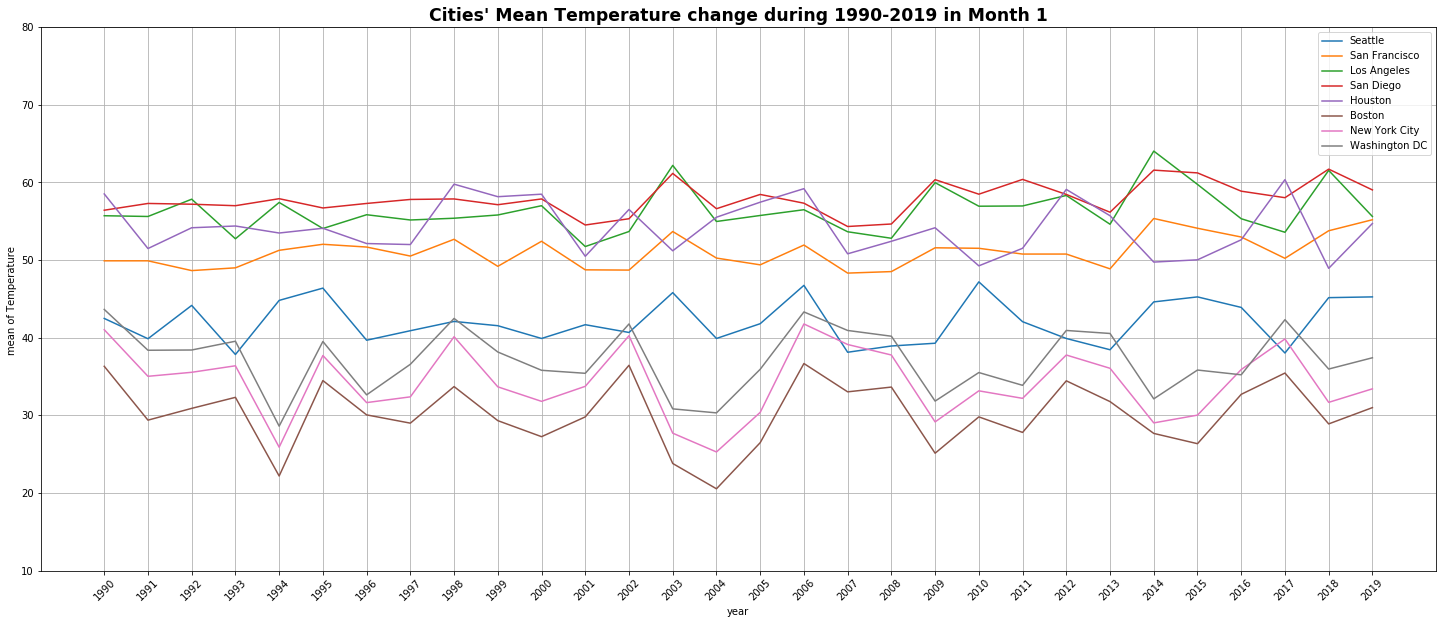

In [133]:
# Parameter
yrs_temp = [1990+i for i in range(30)] # year range
month_temp= 1
fname= 'pics/Cities_m{}_yrs_temp.jpg'.format(month_temp_mth)
# Code
plt.figure(figsize=(25,10))
for city in city_list:
    value_mean_temp = []
    for year in yrs_temp:
        month_start_temp, month_end_temp = get_monthly_start_end(year=year, month=month_temp)
        temp_info = get_info(city, month_start_temp, month_end_temp, info_type ='temperature')
        mean_temp_mth = temp_info['mean'] # selected feature
        value_mean_temp.append(mean_temp_mth)  #
    plt.plot(yrs_temp, value_mean_temp)
plt.xticks(yrs_precip, rotation = 45)
plt.xlabel('year') # apply labels
plt.ylabel('mean of Temperature ')
plt.ylim(10,80)
legend_str = [code_city_refer[city] for city in city_list]
plt.legend(legend_str,loc='best')
title_str = 'Cities\' Mean Temperature change during {}-{} in Month {}'.format(yrs_temp[0], yrs_temp[-1], month_temp)
plt.title(title_str,fontsize='xx-large',fontweight='bold')
#plt.savefig(fname)
plt.grid(True)
plt.show() 